# MTA Traffic Forecasting
Khyatee Desai & Justin Morgan
# Part 4: Modeling Process
This notebook includes feature engineering and modeling

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

### Import Cleaned Data

In [2]:
df = pd.read_pickle("./pickled/cleaned_data")
df

STATION,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,WTC-CORTLANDT,YORK ST,ZEREGA AV,TOTAL
DATE,,,,,,,,,,,,,,,,,,,,,
2020-01-25,6000.0,12145.000000,12986.000000,1158.000000,5164.000000,8085.000000,15009.000000,1699.0,1081.0,34775.000000,...,910.0,2232.000000,2600.000000,9569.0,3063.000000,3983.0,2014.0,3998.000000,1013.000000,1.877042e+06
2020-01-26,4970.0,12145.000000,10707.000000,980.000000,4342.000000,6510.000000,15009.000000,1699.0,969.0,34775.000000,...,799.0,2003.000000,2139.000000,8478.0,2798.000000,3983.0,2014.0,3984.285714,848.000000,1.789382e+06
2020-01-27,5211.5,12312.285714,11175.166667,1169.666667,4356.857143,6533.479167,14979.428571,1699.0,1010.5,34550.428571,...,819.5,2000.428571,2271.333333,9072.5,2922.833333,3983.0,2014.0,3970.571429,889.833333,1.814949e+06
2020-01-28,5453.0,12479.571429,11643.333333,1359.333333,4371.714286,6556.958333,14949.857143,1699.0,1052.0,34325.857143,...,840.0,1997.857143,2403.666667,9667.0,3047.666667,3983.0,2014.0,3956.857143,931.666667,1.840517e+06
2020-01-29,5694.5,12646.857143,12111.500000,1549.000000,4386.571429,6580.437500,14920.285714,1699.0,1093.5,34101.285714,...,860.5,1995.285714,2536.000000,10261.5,3172.500000,3983.0,2014.0,3943.142857,973.500000,1.866085e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,5268.0,9454.000000,9604.000000,1807.000000,3424.000000,6846.000000,10372.000000,2273.0,980.0,22645.000000,...,767.0,1426.000000,2831.000000,8939.0,2626.000000,2408.0,1791.0,2245.000000,1012.000000,1.477816e+06
2021-03-16,5603.0,9833.000000,9215.000000,1870.000000,3857.000000,7587.000000,10726.000000,2402.0,933.0,23895.000000,...,795.0,1531.000000,2912.000000,8538.0,2753.000000,2489.0,1759.0,2356.000000,862.000000,1.541218e+06
2021-03-17,5615.0,9971.000000,9383.000000,1876.000000,3944.000000,7410.000000,11243.000000,2395.0,1026.0,23802.000000,...,803.0,1565.000000,2984.000000,9219.0,2811.000000,2472.0,1808.0,2494.000000,923.000000,1.579899e+06


### Define Dickey-Fuller Test Function

In [3]:
def dickey_fuller(series):
    dftest = adfuller(series)

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dftest)
    print ('\nResults of Dickey-Fuller test: \n')
    print(dfoutput)

## Inspect Stationarity

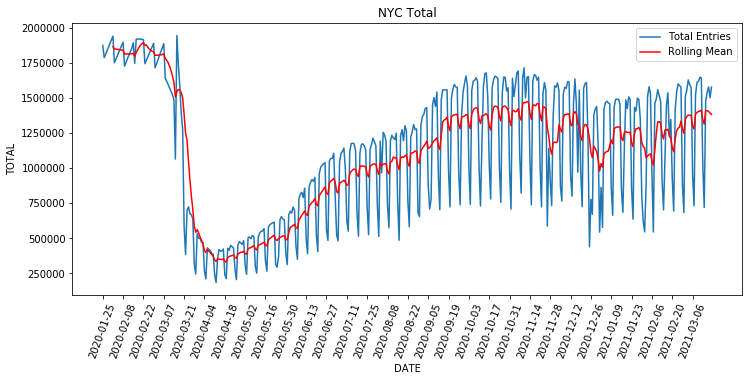

In [4]:
roll_mean = df["TOTAL"].rolling(window=8, center=False).mean()

plt.figure(figsize=(12,5));
ax = sns.lineplot(data= df["TOTAL"], label="Total Entries");
plt.plot(roll_mean, color='red', label='Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%14==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total');

Current data contains both Trends and Seasonality
<br>
**Trend:** Varying mean over time
<br>
**Seasonality:** Certain variations at specific time-frames

### Dickey Fuller Test

In [5]:
dickey_fuller(df["TOTAL"])

(-2.2418313486893693, 0.19141475332823005, 15, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, 10781.145134766986)

Results of Dickey-Fuller test: 

Test Statistic                  -2.241831
p-value                          0.191415
#Lags Used                      15.000000
Number of Observations Used    404.000000
Critical Value (1%)             -3.446640
Critical Value (5%)             -2.868721
Critical Value (10%)            -2.570595
dtype: float64


Dickey Fuller test confirms lack of stationarity
# Remove Trends
Compare and contrast the different methods for removing trends and seasonality in time series data including differencing, rolling means, and log transformations to reduce non-stationarity

## Log Transformation
One way to enforce stationarity can be a simple log transformation to make the time series more "uniform" over time. For example, in the plot below, we can clearly see that there is a significant positive trend, which might not be linear, or when there is a certain level of heteroscedasticity.

The advantage of taking a log transformation is that higher values are penalized more than lower values. Alternatives for the log transformation are the square root, cube root transformations, etc.

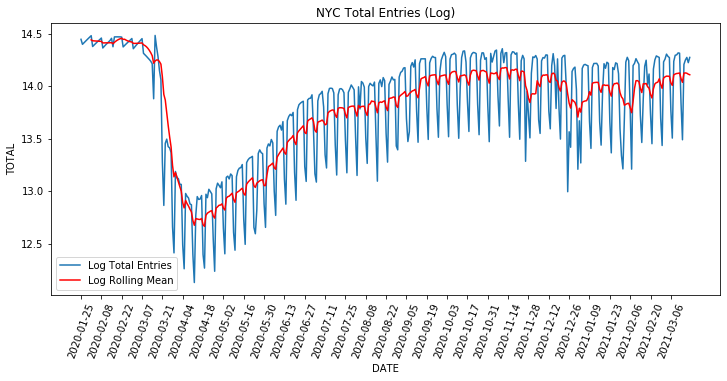

In [6]:
log_roll_mean = np.log(df["TOTAL"]).rolling(window=8, center=False).mean()
log_data = np.log(df["TOTAL"])

plt.figure(figsize=(12,5));
ax = sns.lineplot( data= log_data, label="Log Total Entries");
plt.plot(log_roll_mean, color='red', label='Log Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%14==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total Entries (Log)');

In [7]:
# Drop the missing values from time series calculated above
log_data.dropna(inplace=True)

### Check Stationarity with Dickey Fuller Test

In [8]:
dickey_fuller(log_data)


(-2.2511419313703653, 0.18820987993986232, 15, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, -281.2547643104681)

Results of Dickey-Fuller test: 

Test Statistic                  -2.251142
p-value                          0.188210
#Lags Used                      15.000000
Number of Observations Used    404.000000
Critical Value (1%)             -3.446640
Critical Value (5%)             -2.868721
Critical Value (10%)            -2.570595
dtype: float64


## Subtract Rolling Mean

In [9]:
# Subtract the moving average from the original data
roll_mean = df["TOTAL"].rolling(window=8, center=False).mean()
data_minus_roll_mean = df["TOTAL"] - roll_mean
data_minus_roll_mean.head(15)

DATE
2020-01-25             NaN
2020-01-26             NaN
2020-01-27             NaN
2020-01-28             NaN
2020-01-29             NaN
2020-01-30             NaN
2020-01-31             NaN
2020-02-01    75335.772321
2020-02-02   -99156.479167
2020-02-03   -72630.637254
2020-02-04   -46586.016805
2020-02-05   -20380.867820
2020-02-06     5944.090951
2020-02-07    32717.359509
2020-02-08    58476.646186
Name: TOTAL, dtype: float64

In [10]:
# Drop the missing values from time series calculated above
data_minus_roll_mean.dropna(inplace=True)

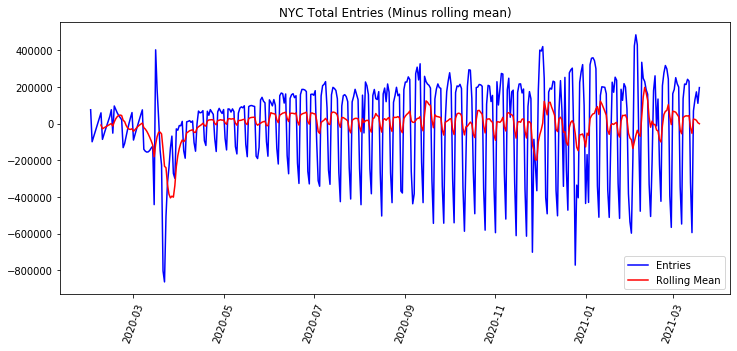

In [11]:
roll_mean = data_minus_roll_mean.rolling(window=8, center=False).mean()

plt.figure(figsize=(12,5));
plt.plot(data_minus_roll_mean, color='blue',label='Entries')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('NYC Total Entries (Minus rolling mean)')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%14==0]);
plt.xticks(rotation=70);


### Check Stationarity with Dickey Fuller Test

In [12]:
dickey_fuller(data_minus_roll_mean)


(-3.9115985879606794, 0.001951126788876224, 14, 398, {'1%': -3.4468876315017423, '5%': -2.868829424528516, '10%': -2.570653059771218}, 10505.234774074786)

Results of Dickey-Fuller test: 

Test Statistic                  -3.911599
p-value                          0.001951
#Lags Used                      14.000000
Number of Observations Used    398.000000
Critical Value (1%)             -3.446888
Critical Value (5%)             -2.868829
Critical Value (10%)            -2.570653
dtype: float64


## Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of an observation at a particular time instant with that at the previous instant (i.e. a so-called 1-period "lag").

This mostly works pretty well in improving stationarity. First-order differencing can be done in Pandas using the .diff() method with periods=1 (denoting a 1-period lag). 

In [13]:
data_diff = df["TOTAL"].diff(periods=1)

In [14]:
# Drop the missing values from time series calculated above
data_diff.dropna(inplace=True)

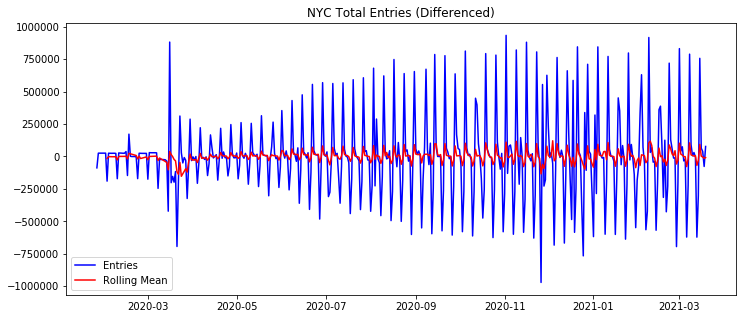

In [15]:
roll_mean = data_diff.rolling(window=8, center=False).mean()

fig = plt.figure(figsize=(12,5))
plt.plot(data_diff, color='blue',label='Entries')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('NYC Total Entries (Differenced)')
plt.show(block=False)

### Confirm Stationarity with Dickey Fuller Test

In [16]:
dickey_fuller(data_diff)


(-4.630982490802522, 0.00011320956614782246, 14, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, 10758.620477050756)

Results of Dickey-Fuller test: 

Test Statistic                  -4.630982
p-value                          0.000113
#Lags Used                      14.000000
Number of Observations Used    404.000000
Critical Value (1%)             -3.446640
Critical Value (5%)             -2.868721
Critical Value (10%)            -2.570595
dtype: float64


## Time Series Decomposition
Time series decomposition is a mathematical procedure that transforms a time series into multiple different time series. The original time series is often split into three component series:

**Seasonal:** Patterns that repeat within a fixed period. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.
<br>
**Trend:** The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.
<br>
**Random:** Also called "noise", "irregular", or "remainder", this is the residual of the original time series after the seasonal and trend series are removed.

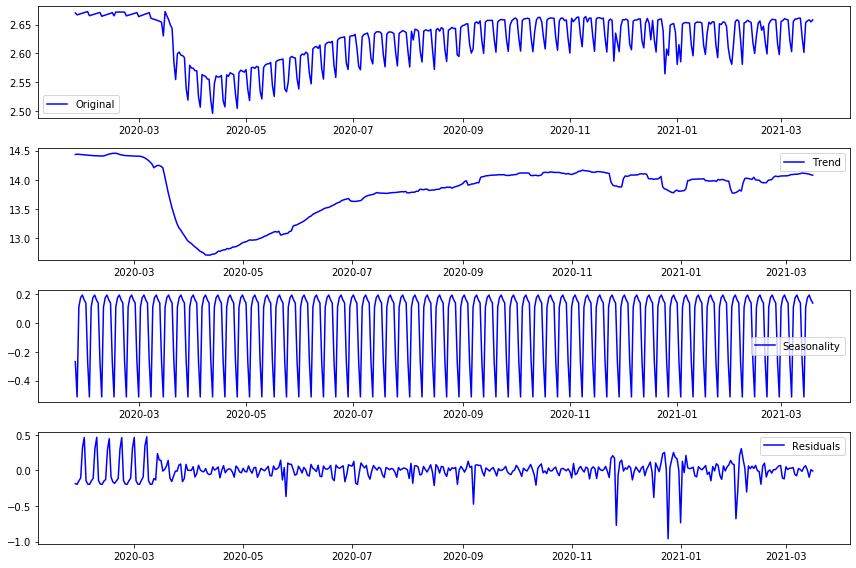

In [17]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(df['TOTAL']))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(np.log(df['TOTAL'])), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

### Check Stationarity of Residuals with Dickey Fuller

In [18]:
# Drop missing values from residuals 
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
dickey_fuller(df_log_decompose)


(-10.42874135462954, 1.6316152739838093e-18, 12, 401, {'1%': -3.4467631030732506, '5%': -2.868774682311516, '10%': -2.570623877774392}, -702.6422043222744)

Results of Dickey-Fuller test: 

Test Statistic                -1.042874e+01
p-value                        1.631615e-18
#Lags Used                     1.200000e+01
Number of Observations Used    4.010000e+02
Critical Value (1%)           -3.446763e+00
Critical Value (5%)           -2.868775e+00
Critical Value (10%)          -2.570624e+00
dtype: float64


# Autocorrelation
Autocorrelation refers to how correlated a time series is with its past values.
Processes with greater autocorrelation are more predictable than those without any form of autocorrelation. This process compares each value in the time series with it's previous value. This is called "lag 1 autocorrelation".

In [19]:
# shift the series forward by 3 lag
total = df['TOTAL']
total_shift_3 = total.shift(periods=3)
lag_3 = pd.concat([total_shift_3, total], axis=1)
lag_3.corr()

,TOTAL,TOTAL
TOTAL,1.000000,0.538818
TOTAL,0.538818,1.000000


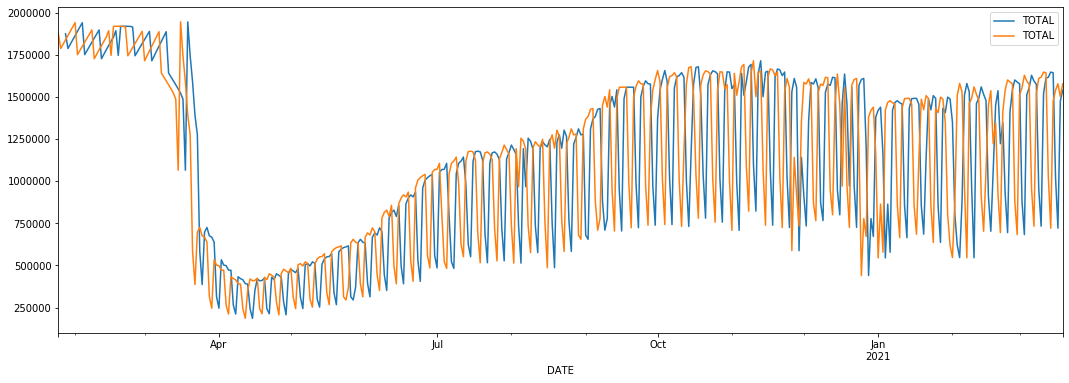

In [20]:
lag_3.plot(figsize=(18,6));

## Autocorrelation Function (ACF)
The autocorrelation function (ACF) is the plot used to see the correlation between the points, up to and including the lag unit.
- It's a function that represents autocorrelation of a time series as a function of the time lag.
- lets you know how the given time series is correlated with itself.
- The dotted lines in the plot tell you about the statistical significance of the correlation.

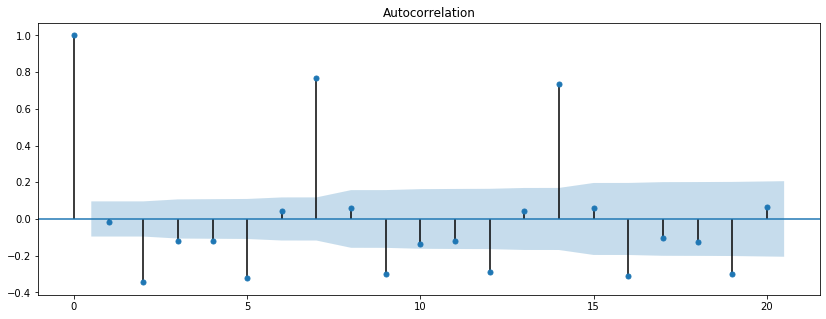

In [21]:
# Try the Statsmodels ACF just for shits
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(data_diff, lags=20);

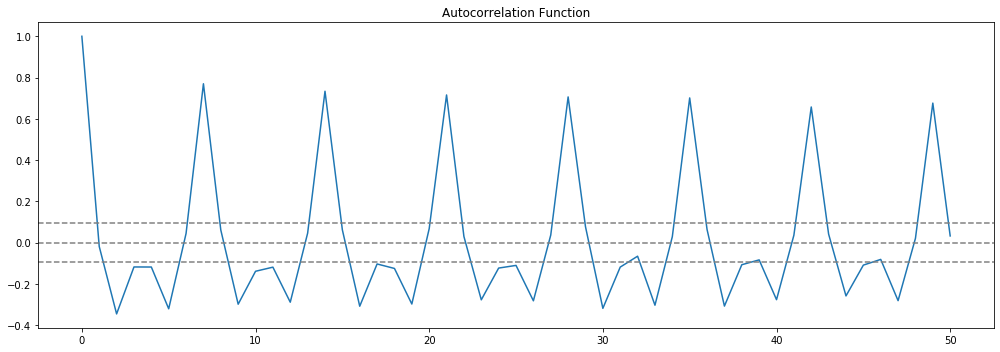

In [22]:
# different statsmodels function
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data_diff, nlags=50)
plt.plot(lag_acf);
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

The differenced ACF seems a little more stable, revolving around 0. Additionally, the autocorrelation for multiples of 7 seems consistently statistically significant, while it decays for longer time lags.
## Partial Autocorrelation Function (PACF)
PACF is a subset of ACF. PACF expresses the correlation between observations made at two points in time while accounting for any influence from other data points.(unlike the autocorrelation function, which does not control for other lags). 
- PACF can be interpreted as a regression of the series against its past lags. 


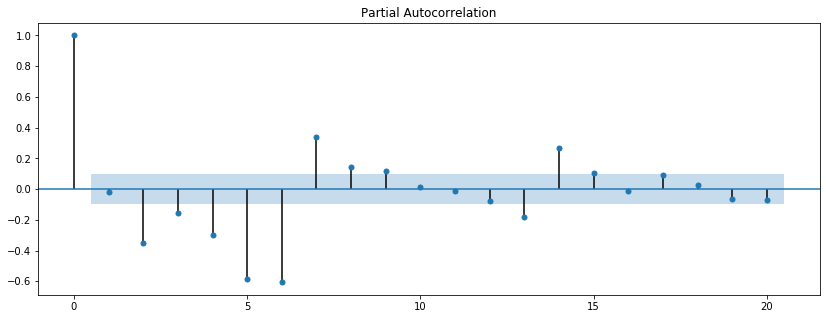

In [23]:
plot_pacf(data_diff, lags=20);

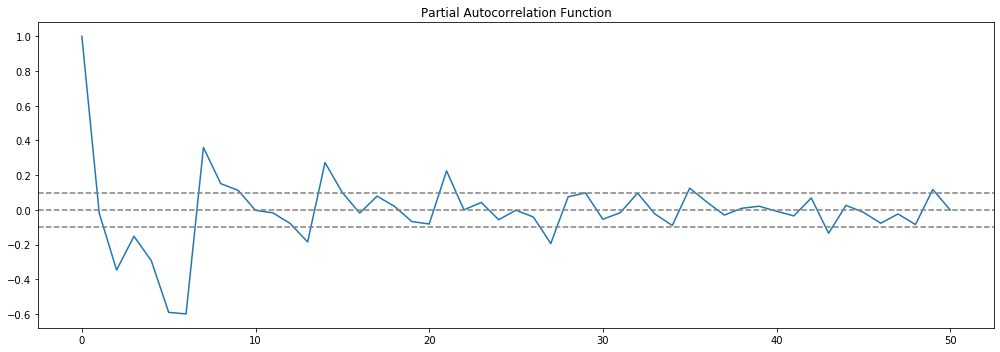

In [24]:
lag_pacf = pacf(data_diff, nlags=50, method='ols')
plt.plot(lag_pacf);
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# ARMA Model
Regression on past values takes place (AR part) and also that the error term is modeled as a linear combination of error terms of the recent past (MA part). ARMA is generally denoted as ARMA(p, q).
- p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
- q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

## Autogregressive (AR) Model 
An autoregressive (AR) model is when a value from a time series is regressed on previous values from the same time series.
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follows an oscillatory process

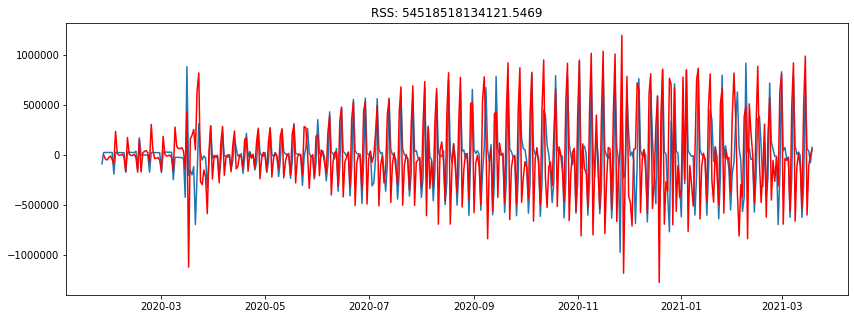

In [25]:
# Import ARIMA
from statsmodels.tsa.arima_model import ARIMA

ar_model = ARIMA(data_diff, order=(7, 1, 0))  
results_AR = ar_model.fit(disp=-1)  
plt.plot(data_diff);
plt.plot(results_AR.fittedvalues, color='red');
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - data_diff).dropna()**2));

## Moving Average (MA) Model
The Moving Average model can be described as the weighted sum of today's and yesterday's noise.
- If the slope is 0, the time series is a white noise model with mean $\mu$
- If the slope is not 0, the time series is autocorrelated and depends on the previous white noise process
- Bigger slope means bigger autocorrelation
- When there is a negative slope, the time series follow an oscillatory process

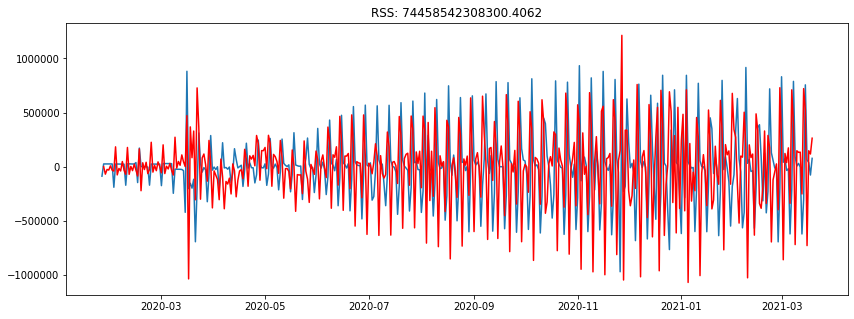

In [26]:
ma_model = ARIMA(data_diff, order=(0, 1, 6))  
results_MA = ma_model.fit(disp=-1)  
plt.plot(data_diff)
plt.plot(results_MA.fittedvalues, color='red');
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - data_diff).dropna()**2));

# Combined ARIMA Model
Combines AR and MA - *still need to figure out how to determine order (p,d,q) values and how to implement differencing before model and undifference after model*

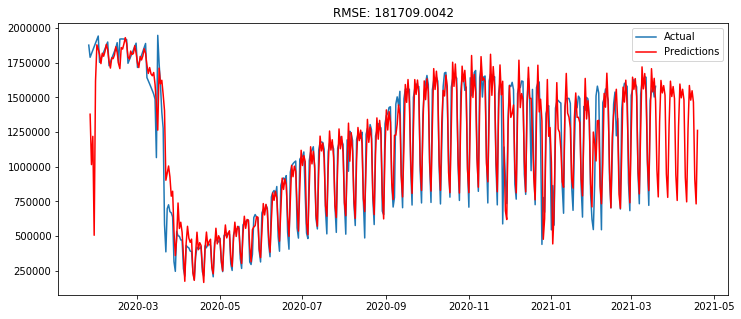

In [27]:
plt.figure(figsize=(12,5));
arima_model = ARIMA(df['TOTAL'], order=(6,0,6))  
arima_fit = arima_model.fit(disp=-1)  
preds = arima_fit.predict(start=1, end=450)

plt.plot(df['TOTAL'], label="Actual")
plt.plot(preds, color='red', label="Predictions");
plt.title('RMSE: %.4f'% np.sqrt(sum((preds - df['TOTAL']).dropna()**2)/len(df['TOTAL'])));
plt.legend(loc='best');

### Return to Original Scale
commented out for now because didnt use differencing for model

In [665]:
# def rebuild_diffed(diffed, original):
#     cumsum = diffed.cumsum()
#     return cumsum.fillna(0) + original

In [666]:
# predictions_ARIMA_diff = pd.Series(arima_fit.fittedvalues, copy=True)
# preds = rebuild_diffed(predictions_ARIMA_diff, df['TOTAL'])


In [667]:
# predictions_ARIMA_diff = pd.Series(arima_fit.fittedvalues, copy=True)
# predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
# predictions_ARIMA_log = pd.Series(df['TOTAL'].iloc[0], index= df['TOTAL'].index)
# predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

# plt.plot(df['TOTAL'], label="Actual");
# plt.plot(predictions_ARIMA_log, label='Predictions');
# plt.legend(loc='best');

## Use Model to Forecast

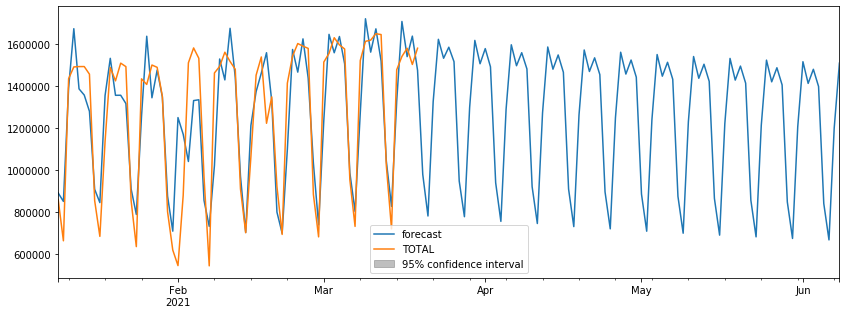

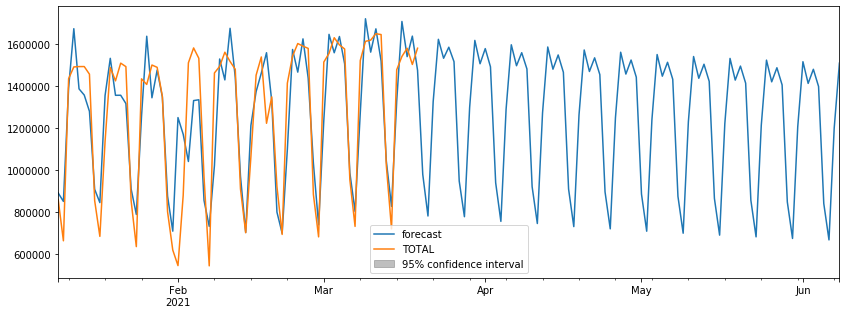

In [70]:
arima_fit.plot_predict(350,500)

# Make Predictions
The following functions are used to determine the best set of (p,d,q) parameters for each column (subway station) in the dataframe, and run an ARIMA model on each column based on those optimal parameters. Predictions are stored in a new dataframe called pred_df.

In [29]:
def evaluate_arima_model(series, arima_order):
    '''Evaluate an ARIMA model for a given order (p,d,q) and return RMSE'''
    arima_model = ARIMA(series, order=arima_order)  
    arima_fit = arima_model.fit(disp=-1)  
    rmse = np.sqrt(sum((arima_fit.fittedvalues - series).dropna()**2)/len(series))
    return rmse

In [30]:
def evaluate_models(series, p_values, d_values, q_values):
    '''Test different possible combinations of p,d,q values that provide the lowest RMSE 
        on a given series. Returns the best order of pdq'''
    series = series.astype('float32')
    best_score, best_order = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    order = (p, d, q)
                    rmse = evaluate_arima_model(series, order)
                    if rmse < best_score:
                        best_score, best_order = rmse, order
#                     print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA: %s  RMSE=%.3f' % (best_order, best_score))
    return best_order
    

In [58]:
def predict(df, columns):
    '''Takes main dataframe and list of columns, returns dataframe of forecast predictions'''
    pred_df = pd.DataFrame()
    for station in columns:
        best_order = evaluate_models(df[station],range(0, 9),range(0, 1),range(0, 9))
        try:
            arima_model = ARIMA(df[station], order=(best_order)) 
            arima_fit = arima_model.fit()  
            preds = arima_fit.predict(start=df.shape[0],end=df.shape[0]+60)
            pred_df[station] = preds
        except:
            print('\nFAILED:',station)
    return(pred_df)


### Initial Predictions on entire df
Leave commented out (took ~8 hours)

In [ ]:
# pred_df = predict(df, df.columns)
# pred_df.to_pickle("./pickled/predictions")

Inspect output of the first run (reproduced below)

In [ ]:
'''
Best ARIMA: (6, 0, 7)  RMSE=617.520
Best ARIMA: (6, 0, 4)  RMSE=959.621
Best ARIMA: (7, 0, 7)  RMSE=988.387
Best ARIMA: (7, 0, 7)  RMSE=211.033
Best ARIMA: (7, 0, 5)  RMSE=407.632
Best ARIMA: (7, 0, 7)  RMSE=708.294
Best ARIMA: (7, 0, 4)  RMSE=1086.715
Best ARIMA: (5, 0, 6)  RMSE=276.212
Best ARIMA: (7, 0, 6)  RMSE=101.271
Best ARIMA: (7, 0, 4)  RMSE=2568.608
Best ARIMA: (7, 0, 4)  RMSE=726.628
Best ARIMA: (7, 0, 6)  RMSE=413.153
Best ARIMA: (6, 0, 6)  RMSE=166.686
Best ARIMA: (7, 0, 6)  RMSE=1325.803
Best ARIMA: (6, 0, 7)  RMSE=2299.283
Best ARIMA: (7, 0, 4)  RMSE=1194.055
Best ARIMA: (5, 0, 6)  RMSE=511.875
Best ARIMA: (5, 0, 7)  RMSE=273.935
Best ARIMA: (6, 0, 5)  RMSE=161.940
Best ARIMA: (7, 0, 5)  RMSE=243.958
Best ARIMA: (5, 0, 6)  RMSE=708.076
Best ARIMA: (7, 0, 6)  RMSE=863.131
Best ARIMA: (7, 0, 7)  RMSE=164.795
Best ARIMA: (7, 0, 6)  RMSE=778.667
Best ARIMA: (7, 0, 4)  RMSE=1018.733
Best ARIMA: (7, 0, 6)  RMSE=326.173
Best ARIMA: (7, 0, 7)  RMSE=578.941
Best ARIMA: (7, 0, 5)  RMSE=291.550
Best ARIMA: (6, 0, 7)  RMSE=243.945
Best ARIMA: (7, 0, 7)  RMSE=494.383
Best ARIMA: (7, 0, 6)  RMSE=264.659
Best ARIMA: (5, 0, 7)  RMSE=705.110
Best ARIMA: (5, 0, 7)  RMSE=193.532
Best ARIMA: (7, 0, 6)  RMSE=740.894
Best ARIMA: (7, 0, 6)  RMSE=213.819
Best ARIMA: (7, 0, 6)  RMSE=254.359
Best ARIMA: (7, 0, 6)  RMSE=135.749
Best ARIMA: (6, 0, 7)  RMSE=80.378
Best ARIMA: (7, 0, 4)  RMSE=375.211
Best ARIMA: (7, 0, 7)  RMSE=337.443
Best ARIMA: (7, 0, 4)  RMSE=393.936
Best ARIMA: (7, 0, 7)  RMSE=69.495
Best ARIMA: (7, 0, 7)  RMSE=432.399
Best ARIMA: (7, 0, 6)  RMSE=80.479
Best ARIMA: (7, 0, 7)  RMSE=150.330
Best ARIMA: (7, 0, 7)  RMSE=185.113
Best ARIMA: (7, 0, 7)  RMSE=2729.184
Best ARIMA: (7, 0, 6)  RMSE=458.199

FAILED: 231 ST
Best ARIMA: (7, 0, 6)  RMSE=274.490
Best ARIMA: (6, 0, 6)  RMSE=213.176
Best ARIMA: (7, 0, 7)  RMSE=176.574
Best ARIMA: (7, 0, 7)  RMSE=166.617
Best ARIMA: (7, 0, 4)  RMSE=1191.307
Best ARIMA: (7, 0, 7)  RMSE=203.692
Best ARIMA: (6, 0, 4)  RMSE=400.738
Best ARIMA: (5, 0, 7)  RMSE=1101.743
Best ARIMA: (5, 0, 6)  RMSE=494.236
Best ARIMA: (7, 0, 6)  RMSE=868.174
Best ARIMA: (7, 0, 6)  RMSE=325.247
Best ARIMA: (6, 0, 7)  RMSE=3237.458
Best ARIMA: (7, 0, 7)  RMSE=662.503
Best ARIMA: (5, 0, 4)  RMSE=4633.435
Best ARIMA: (6, 0, 7)  RMSE=238.885
Best ARIMA: (7, 0, 6)  RMSE=731.226
Best ARIMA: (6, 0, 7)  RMSE=114.005
Best ARIMA: (7, 0, 7)  RMSE=150.633
Best ARIMA: (6, 0, 7)  RMSE=365.033
Best ARIMA: (7, 0, 4)  RMSE=1082.937
Best ARIMA: (6, 0, 7)  RMSE=2857.305
Best ARIMA: (7, 0, 7)  RMSE=307.763
Best ARIMA: (7, 0, 7)  RMSE=302.050
Best ARIMA: (6, 0, 7)  RMSE=497.477
Best ARIMA: (7, 0, 6)  RMSE=1768.864
Best ARIMA: (6, 0, 7)  RMSE=338.658
Best ARIMA: (5, 0, 4)  RMSE=345.408
Best ARIMA: (7, 0, 5)  RMSE=772.259
Best ARIMA: (5, 0, 6)  RMSE=455.938
Best ARIMA: (7, 0, 5)  RMSE=421.124
Best ARIMA: (7, 0, 6)  RMSE=824.418
Best ARIMA: (7, 0, 7)  RMSE=371.342
Best ARIMA: (7, 0, 5)  RMSE=253.132
Best ARIMA: (7, 0, 7)  RMSE=372.665
Best ARIMA: (6, 0, 7)  RMSE=130.809
Best ARIMA: (7, 0, 6)  RMSE=368.092
Best ARIMA: (7, 0, 4)  RMSE=715.032
Best ARIMA: (7, 0, 6)  RMSE=2260.203
Best ARIMA: (7, 0, 6)  RMSE=1630.994
Best ARIMA: (6, 0, 6)  RMSE=130.859
Best ARIMA: (7, 0, 6)  RMSE=700.353
Best ARIMA: (7, 0, 7)  RMSE=606.825
Best ARIMA: (7, 0, 7)  RMSE=137.292
Best ARIMA: (7, 0, 6)  RMSE=399.544
Best ARIMA: (7, 0, 6)  RMSE=308.821
Best ARIMA: (7, 0, 6)  RMSE=789.559
Best ARIMA: (7, 0, 5)  RMSE=229.990
Best ARIMA: (7, 0, 4)  RMSE=900.186
Best ARIMA: (7, 0, 7)  RMSE=227.736
Best ARIMA: (6, 0, 4)  RMSE=1168.439
Best ARIMA: (7, 0, 6)  RMSE=1131.548
Best ARIMA: (6, 0, 7)  RMSE=142.657
Best ARIMA: (7, 0, 4)  RMSE=143.111
Best ARIMA: (7, 0, 6)  RMSE=171.016
Best ARIMA: (7, 0, 6)  RMSE=1207.954
Best ARIMA: (6, 0, 4)  RMSE=711.351
Best ARIMA: (7, 0, 6)  RMSE=806.420
Best ARIMA: (7, 0, 7)  RMSE=257.674
Best ARIMA: (7, 0, 7)  RMSE=201.869
Best ARIMA: (7, 0, 7)  RMSE=270.505
Best ARIMA: (7, 0, 6)  RMSE=763.783
Best ARIMA: (7, 0, 6)  RMSE=189.215
Best ARIMA: (7, 0, 4)  RMSE=3029.603
Best ARIMA: (7, 0, 4)  RMSE=697.405
Best ARIMA: (7, 0, 4)  RMSE=170.947
Best ARIMA: (7, 0, 7)  RMSE=250.984
Best ARIMA: (7, 0, 6)  RMSE=809.286
Best ARIMA: (7, 0, 5)  RMSE=2053.493
Best ARIMA: (7, 0, 4)  RMSE=661.365
Best ARIMA: (7, 0, 7)  RMSE=127.948
Best ARIMA: (6, 0, 7)  RMSE=110.209
Best ARIMA: (7, 0, 7)  RMSE=254.753
Best ARIMA: (6, 0, 7)  RMSE=44.870
Best ARIMA: (5, 0, 4)  RMSE=73.126
Best ARIMA: (7, 0, 5)  RMSE=309.285
Best ARIMA: (6, 0, 5)  RMSE=318.228
Best ARIMA: (6, 0, 7)  RMSE=567.534
Best ARIMA: (7, 0, 6)  RMSE=1524.780
Best ARIMA: (6, 0, 6)  RMSE=111.559
Best ARIMA: (7, 0, 4)  RMSE=139.216
Best ARIMA: (7, 0, 6)  RMSE=127.392
Best ARIMA: (6, 0, 4)  RMSE=289.844

FAILED: AVENUE J
Best ARIMA: (5, 0, 6)  RMSE=275.123
Best ARIMA: (7, 0, 5)  RMSE=197.937
Best ARIMA: (7, 0, 6)  RMSE=164.748
Best ARIMA: (7, 0, 7)  RMSE=503.425
Best ARIMA: (7, 0, 6)  RMSE=172.891
Best ARIMA: (6, 0, 7)  RMSE=547.926
Best ARIMA: (5, 0, 7)  RMSE=110.047
Best ARIMA: (7, 0, 7)  RMSE=604.548
Best ARIMA: (7, 0, 6)  RMSE=290.015
Best ARIMA: (7, 0, 4)  RMSE=293.343
Best ARIMA: (7, 0, 5)  RMSE=163.160
Best ARIMA: (7, 0, 6)  RMSE=12.871
Best ARIMA: (7, 0, 6)  RMSE=97.892

FAILED: BEACH 25 ST
Best ARIMA: (5, 0, 6)  RMSE=63.597
Best ARIMA: (7, 0, 7)  RMSE=44.822
Best ARIMA: (6, 0, 7)  RMSE=132.505
Best ARIMA: (7, 0, 5)  RMSE=172.176

FAILED: BEACH 67 ST
Best ARIMA: (7, 0, 6)  RMSE=53.987
Best ARIMA: (7, 0, 6)  RMSE=26.347
Best ARIMA: (6, 0, 7)  RMSE=728.937
Best ARIMA: (7, 0, 6)  RMSE=460.187
Best ARIMA: (5, 0, 7)  RMSE=253.477
Best ARIMA: (6, 0, 4)  RMSE=386.078
Best ARIMA: (4, 0, 5)  RMSE=178.459
Best ARIMA: (7, 0, 4)  RMSE=209.600
Best ARIMA: (7, 0, 6)  RMSE=333.705
Best ARIMA: (7, 0, 4)  RMSE=1145.669
Best ARIMA: (6, 0, 5)  RMSE=38.745
Best ARIMA: (7, 0, 4)  RMSE=132.139
Best ARIMA: (5, 0, 7)  RMSE=775.089
Best ARIMA: (7, 0, 7)  RMSE=205.108
Best ARIMA: (5, 0, 7)  RMSE=587.183
Best ARIMA: (7, 0, 6)  RMSE=15.677
Best ARIMA: (7, 0, 6)  RMSE=236.837
Best ARIMA: (5, 0, 7)  RMSE=569.218
Best ARIMA: (7, 0, 6)  RMSE=458.299
Best ARIMA: (7, 0, 7)  RMSE=115.888
Best ARIMA: (7, 0, 4)  RMSE=352.228
Best ARIMA: (6, 0, 7)  RMSE=412.709
Best ARIMA: (7, 0, 6)  RMSE=209.772
Best ARIMA: (7, 0, 7)  RMSE=153.558
Best ARIMA: (7, 0, 6)  RMSE=424.028
Best ARIMA: (6, 0, 7)  RMSE=109.475
Best ARIMA: (6, 0, 5)  RMSE=1586.130
Best ARIMA: (7, 0, 7)  RMSE=545.275
Best ARIMA: (7, 0, 5)  RMSE=309.437
Best ARIMA: (7, 0, 7)  RMSE=313.505
Best ARIMA: (7, 0, 4)  RMSE=536.949
Best ARIMA: (7, 0, 6)  RMSE=160.601
Best ARIMA: (6, 0, 4)  RMSE=270.888
Best ARIMA: (7, 0, 4)  RMSE=1312.974
Best ARIMA: (7, 0, 5)  RMSE=121.544
Best ARIMA: (7, 0, 5)  RMSE=342.272
Best ARIMA: (7, 0, 4)  RMSE=1556.523
Best ARIMA: (6, 0, 4)  RMSE=430.543
Best ARIMA: (6, 0, 7)  RMSE=179.842
Best ARIMA: (7, 0, 4)  RMSE=133.725
Best ARIMA: (6, 0, 6)  RMSE=189.361
Best ARIMA: (7, 0, 6)  RMSE=136.453
Best ARIMA: (6, 0, 4)  RMSE=317.248
Best ARIMA: (5, 0, 7)  RMSE=700.854
Best ARIMA: (7, 0, 6)  RMSE=273.212
Best ARIMA: (7, 0, 7)  RMSE=400.119
Best ARIMA: (7, 0, 6)  RMSE=473.456
Best ARIMA: (7, 0, 6)  RMSE=260.868
Best ARIMA: (7, 0, 6)  RMSE=230.296
Best ARIMA: (7, 0, 6)  RMSE=1436.130
Best ARIMA: (7, 0, 4)  RMSE=179.414
Best ARIMA: (6, 0, 7)  RMSE=75.629
Best ARIMA: (7, 0, 4)  RMSE=1165.367
Best ARIMA: (6, 0, 7)  RMSE=691.965
Best ARIMA: (7, 0, 6)  RMSE=258.336
Best ARIMA: (7, 0, 4)  RMSE=583.729
Best ARIMA: (6, 0, 6)  RMSE=60.047

FAILED: E 143/ST MARY'S
Best ARIMA: (7, 0, 6)  RMSE=253.677

FAILED: E 149 ST
Best ARIMA: (7, 0, 6)  RMSE=402.247
Best ARIMA: (7, 0, 6)  RMSE=188.642
Best ARIMA: (6, 0, 6)  RMSE=608.087
Best ARIMA: (6, 0, 7)  RMSE=288.638
Best ARIMA: (6, 0, 7)  RMSE=106.609
Best ARIMA: (7, 0, 4)  RMSE=317.810
Best ARIMA: (7, 0, 7)  RMSE=568.533
Best ARIMA: (7, 0, 6)  RMSE=437.326
Best ARIMA: (5, 0, 4)  RMSE=467.249
Best ARIMA: (6, 0, 6)  RMSE=317.647
Best ARIMA: (7, 0, 6)  RMSE=801.534
Best ARIMA: (7, 0, 6)  RMSE=517.743
Best ARIMA: (7, 0, 7)  RMSE=2525.035
Best ARIMA: (7, 0, 7)  RMSE=899.630
Best ARIMA: (7, 0, 6)  RMSE=220.801
Best ARIMA: (6, 0, 7)  RMSE=1007.781
Best ARIMA: (7, 0, 4)  RMSE=633.175
Best ARIMA: (6, 0, 7)  RMSE=108.917
Best ARIMA: (6, 0, 7)  RMSE=210.217
Best ARIMA: (7, 0, 6)  RMSE=332.539
Best ARIMA: (7, 0, 7)  RMSE=563.787
Best ARIMA: (6, 0, 6)  RMSE=2233.242
Best ARIMA: (7, 0, 6)  RMSE=241.605
Best ARIMA: (5, 0, 6)  RMSE=353.955
Best ARIMA: (6, 0, 4)  RMSE=208.524
Best ARIMA: (7, 0, 5)  RMSE=1148.476
Best ARIMA: (7, 0, 7)  RMSE=758.049
Best ARIMA: (7, 0, 5)  RMSE=305.097
Best ARIMA: (7, 0, 4)  RMSE=3079.543
Best ARIMA: (6, 0, 7)  RMSE=405.046
Best ARIMA: (7, 0, 7)  RMSE=539.866
Best ARIMA: (7, 0, 6)  RMSE=507.970
Best ARIMA: (7, 0, 6)  RMSE=542.974
Best ARIMA: (7, 0, 5)  RMSE=172.051
Best ARIMA: (7, 0, 6)  RMSE=308.119
Best ARIMA: (6, 0, 7)  RMSE=133.695
Best ARIMA: (7, 0, 5)  RMSE=265.983
Best ARIMA: (6, 0, 7)  RMSE=318.437
Best ARIMA: (6, 0, 7)  RMSE=87.583
Best ARIMA: (6, 0, 7)  RMSE=251.925
Best ARIMA: (7, 0, 4)  RMSE=440.695
Best ARIMA: (7, 0, 5)  RMSE=284.088
Best ARIMA: (6, 0, 7)  RMSE=508.381
Best ARIMA: (7, 0, 6)  RMSE=144.807
Best ARIMA: (7, 0, 7)  RMSE=472.103
Best ARIMA: (7, 0, 7)  RMSE=216.561
Best ARIMA: (7, 0, 6)  RMSE=1081.716
Best ARIMA: (7, 0, 4)  RMSE=1719.646
Best ARIMA: (7, 0, 6)  RMSE=270.550
Best ARIMA: (7, 0, 4)  RMSE=1126.260
Best ARIMA: (7, 0, 4)  RMSE=322.514
Best ARIMA: (5, 0, 4)  RMSE=141.770
Best ARIMA: (7, 0, 4)  RMSE=2300.744
Best ARIMA: (7, 0, 7)  RMSE=1481.533

FAILED: JOURNAL SQUARE
Best ARIMA: (7, 0, 6)  RMSE=1163.808
Best ARIMA: (6, 0, 7)  RMSE=126.880
Best ARIMA: (7, 0, 4)  RMSE=1090.508
Best ARIMA: (7, 0, 6)  RMSE=1265.115
Best ARIMA: (7, 0, 6)  RMSE=708.106
Best ARIMA: (7, 0, 4)  RMSE=188.403
Best ARIMA: (7, 0, 4)  RMSE=209.370
Best ARIMA: (7, 0, 6)  RMSE=199.521
Best ARIMA: (7, 0, 5)  RMSE=176.375
Best ARIMA: (7, 0, 7)  RMSE=204.097
Best ARIMA: (7, 0, 6)  RMSE=146.830
Best ARIMA: (7, 0, 7)  RMSE=1288.049
Best ARIMA: (7, 0, 4)  RMSE=774.021
Best ARIMA: (7, 0, 5)  RMSE=126.231
Best ARIMA: (7, 0, 6)  RMSE=176.516
Best ARIMA: (7, 0, 7)  RMSE=151.810
Best ARIMA: (6, 0, 7)  RMSE=332.255
Best ARIMA: (7, 0, 4)  RMSE=298.452
Best ARIMA: (7, 0, 5)  RMSE=466.112
Best ARIMA: (6, 0, 7)  RMSE=440.944
Best ARIMA: (7, 0, 6)  RMSE=137.679
Best ARIMA: (5, 0, 7)  RMSE=98.167
Best ARIMA: (5, 0, 6)  RMSE=272.615
Best ARIMA: (7, 0, 6)  RMSE=269.969
Best ARIMA: (6, 0, 6)  RMSE=335.644
Best ARIMA: (7, 0, 7)  RMSE=138.699

FAILED: MORRIS PARK
Best ARIMA: (6, 0, 7)  RMSE=382.812
Best ARIMA: (6, 0, 7)  RMSE=276.569
Best ARIMA: (7, 0, 6)  RMSE=374.162
Best ARIMA: (7, 0, 4)  RMSE=238.858
Best ARIMA: (7, 0, 7)  RMSE=794.272
Best ARIMA: (6, 0, 4)  RMSE=323.048
Best ARIMA: (6, 0, 7)  RMSE=176.504
Best ARIMA: (7, 0, 4)  RMSE=88.915
Best ARIMA: (7, 0, 6)  RMSE=184.415
Best ARIMA: (7, 0, 4)  RMSE=349.846
Best ARIMA: (7, 0, 6)  RMSE=256.467
Best ARIMA: (6, 0, 7)  RMSE=278.143
Best ARIMA: (6, 0, 7)  RMSE=238.997
Best ARIMA: (6, 0, 7)  RMSE=770.597
Best ARIMA: (7, 0, 7)  RMSE=182.100
Best ARIMA: None  RMSE=inf

FAILED: NEWARK HM HE
Best ARIMA: (7, 0, 7)  RMSE=161.088
Best ARIMA: (7, 0, 6)  RMSE=333.950
Best ARIMA: (7, 0, 5)  RMSE=532.916
Best ARIMA: (7, 0, 7)  RMSE=315.619
Best ARIMA: (7, 0, 4)  RMSE=382.533
Best ARIMA: (7, 0, 6)  RMSE=142.625
Best ARIMA: (7, 0, 6)  RMSE=677.136
Best ARIMA: (5, 0, 7)  RMSE=183.822

FAILED: OCEAN PKWY
Best ARIMA: None  RMSE=inf

FAILED: ORCHARD BEACH
Best ARIMA: (7, 0, 4)  RMSE=483.555
Best ARIMA: (7, 0, 4)  RMSE=140.778
Best ARIMA: (7, 0, 6)  RMSE=685.283
Best ARIMA: (5, 0, 7)  RMSE=307.145
Best ARIMA: (7, 0, 6)  RMSE=356.280
Best ARIMA: (7, 0, 7)  RMSE=1836.858

FAILED: PATH NEW WTC
Best ARIMA: (7, 0, 7)  RMSE=192.810
Best ARIMA: (6, 0, 4)  RMSE=403.257
Best ARIMA: (6, 0, 6)  RMSE=389.108
Best ARIMA: (7, 0, 6)  RMSE=528.651
Best ARIMA: (6, 0, 4)  RMSE=222.424
Best ARIMA: (7, 0, 6)  RMSE=127.846
Best ARIMA: (7, 0, 6)  RMSE=284.440
Best ARIMA: (7, 0, 4)  RMSE=532.579
Best ARIMA: (5, 0, 6)  RMSE=333.211
Best ARIMA: (6, 0, 7)  RMSE=333.645

FAILED: QUEENS PLAZA
Best ARIMA: (7, 0, 7)  RMSE=435.256
Best ARIMA: (7, 0, 4)  RMSE=230.604
Best ARIMA: (7, 0, 5)  RMSE=284.401
Best ARIMA: (4, 0, 6)  RMSE=211.222
Best ARIMA: (4, 0, 7)  RMSE=214.735
Best ARIMA: (7, 0, 6)  RMSE=450.356
Best ARIMA: (7, 0, 5)  RMSE=397.531

FAILED: ROCKAWAY BLVD
Best ARIMA: (7, 0, 7)  RMSE=54.777
Best ARIMA: (7, 0, 4)  RMSE=258.068
Best ARIMA: (6, 0, 7)  RMSE=271.005
Best ARIMA: (7, 0, 6)  RMSE=147.728
Best ARIMA: (7, 0, 6)  RMSE=632.359
Best ARIMA: (7, 0, 4)  RMSE=136.043
Best ARIMA: (7, 0, 6)  RMSE=400.901
Best ARIMA: (7, 0, 6)  RMSE=178.173

FAILED: SMITH-9 ST
Best ARIMA: (7, 0, 6)  RMSE=323.344
Best ARIMA: (7, 0, 7)  RMSE=487.291
Best ARIMA: (6, 0, 6)  RMSE=212.754

FAILED: ST LAWRENCE AV
Best ARIMA: (7, 0, 6)  RMSE=513.470
Best ARIMA: (6, 0, 7)  RMSE=500.818
Best ARIMA: (7, 0, 4)  RMSE=264.231
Best ARIMA: (7, 0, 6)  RMSE=224.591
Best ARIMA: (7, 0, 4)  RMSE=922.194
Best ARIMA: (7, 0, 6)  RMSE=201.531
Best ARIMA: (7, 0, 6)  RMSE=368.204
Best ARIMA: (7, 0, 7)  RMSE=376.156
Best ARIMA: (7, 0, 4)  RMSE=595.667
Best ARIMA: (7, 0, 7)  RMSE=1905.554
Best ARIMA: (7, 0, 6)  RMSE=53.210
Best ARIMA: (7, 0, 4)  RMSE=432.679
Best ARIMA: (6, 0, 6)  RMSE=223.043
Best ARIMA: (7, 0, 7)  RMSE=227.813
Best ARIMA: (7, 0, 5)  RMSE=596.823
Best ARIMA: (7, 0, 5)  RMSE=397.756
Best ARIMA: (7, 0, 6)  RMSE=239.654
Best ARIMA: (7, 0, 6)  RMSE=121.508
Best ARIMA: (6, 0, 5)  RMSE=574.346
Best ARIMA: (6, 0, 7)  RMSE=770.234
Best ARIMA: (7, 0, 7)  RMSE=113.966

FAILED: W 8 ST-AQUARIUM
Best ARIMA: (7, 0, 6)  RMSE=291.290
Best ARIMA: (7, 0, 4)  RMSE=921.775
Best ARIMA: (7, 0, 7)  RMSE=249.823
Best ARIMA: (5, 0, 7)  RMSE=317.523
Best ARIMA: (7, 0, 6)  RMSE=452.665
Best ARIMA: (5, 0, 6)  RMSE=102.438
Best ARIMA: (7, 0, 6)  RMSE=200.011
Best ARIMA: (7, 0, 5)  RMSE=365.066
Best ARIMA: (7, 0, 7)  RMSE=1011.021
Best ARIMA: (6, 0, 5)  RMSE=352.582
Best ARIMA: (5, 0, 7)  RMSE=465.139
Best ARIMA: (7, 0, 4)  RMSE=207.126
Best ARIMA: (7, 0, 6)  RMSE=392.158
Best ARIMA: (5, 0, 7)  RMSE=124.984
Best ARIMA: (6, 0, 5)  RMSE=167475.100

FAILED: TOTAL
'''

### Rerun failed columns with more parameters

In [41]:
pred_df = pd.read_pickle("./pickled/predictions")
pred_df

,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WHITEHALL S-FRY,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,WTC-CORTLANDT,YORK ST,ZEREGA AV
2021-03-20,4296.785355,5976.749037,7341.711508,1112.826288,2526.507237,5435.679809,8089.347507,1502.305131,696.615587,17398.650371,...,1990.439651,474.968263,822.963151,1408.298484,6374.287534,1681.797759,424.537371,1440.325857,325.589716,503.944757
2021-03-21,3339.505325,5317.587494,5562.753575,850.476830,1760.370427,3878.072421,6265.955166,1136.411813,480.989398,13141.291106,...,1558.967764,393.993156,575.970029,1064.631314,4720.675724,1291.871454,248.451355,1164.408859,252.426057,432.039177
2021-03-22,4802.626553,8708.173735,9139.488624,1686.612384,3113.245277,6643.436464,9666.094904,2072.953159,907.716641,21001.289890,...,2965.352938,670.574005,1135.846660,2618.266494,8504.510453,2261.224613,2058.312545,1681.401812,1971.375785,822.033250
2021-03-23,5761.996304,10537.737815,9324.752966,1805.267767,3870.292729,7338.475454,10699.274872,2581.542608,932.034349,23867.403683,...,3162.151470,840.819770,1271.643162,3032.807578,9160.711727,2916.532768,2816.058372,1820.046498,2409.351142,988.895493
2021-03-24,5470.827307,9660.343755,9503.418165,1864.087066,3885.402571,7533.784388,11630.287364,2312.957972,1014.705366,24361.731629,...,3211.652330,801.636379,1349.568959,2778.447527,9463.550316,2714.209905,2483.488149,1893.384075,2618.232431,897.246646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-15,3858.106573,6198.206496,6958.916210,881.061534,2407.397335,5004.695095,7906.636169,1499.620728,639.506670,18190.291736,...,1455.399492,468.944933,822.965860,993.809162,6396.259851,1666.954921,298.440127,1406.797949,892.458320,505.650574
2021-05-16,3057.640801,5195.777685,5481.741108,684.417051,2078.150163,3620.120243,7513.030105,1131.848393,537.320427,17487.857560,...,1050.067390,397.900042,578.921800,776.633222,4714.182848,1300.296240,298.622254,1360.018942,850.002513,436.390520
2021-05-17,4433.177364,8670.465510,8667.834885,1498.706954,2604.613302,6117.970425,8715.118239,2060.773125,703.635123,19196.305914,...,2352.629434,680.418586,1125.791814,2162.974355,8468.862483,2290.768232,2164.459526,1479.556653,1387.969337,827.998945
2021-05-18,5310.348593,10477.570418,8582.235202,1572.505110,3361.118256,6720.962684,9897.405405,2578.609686,782.378445,21764.704433,...,2696.103315,846.445182,1270.741907,2706.117157,9166.778237,2949.348054,2843.366974,1666.475975,1975.955243,989.509132


In [53]:
failed_cols = list(set(df.columns)-set(pred_df.columns))
pred_df_2 = predict(df, failed_cols)

Best ARIMA: None  RMSE=inf

FAILED: ORCHARD BEACH
Best ARIMA: (6, 0, 7)  RMSE=179.971
Best ARIMA: (7, 0, 7)  RMSE=1839.295
Best ARIMA: (7, 0, 8)  RMSE=451.353
Best ARIMA: (7, 0, 6)  RMSE=97.918

FAILED: BEACH 25 ST
Best ARIMA: (8, 0, 7)  RMSE=357.415
Best ARIMA: (8, 0, 8)  RMSE=55.507
Best ARIMA: (8, 0, 4)  RMSE=168520.777
Best ARIMA: (7, 0, 7)  RMSE=1479.967
Best ARIMA: None  RMSE=inf

FAILED: NEWARK HM HE
Best ARIMA: (7, 0, 7)  RMSE=172.622
Best ARIMA: (5, 0, 7)  RMSE=115.975
Best ARIMA: (6, 0, 7)  RMSE=333.653
Best ARIMA: (8, 0, 5)  RMSE=214.648
Best ARIMA: (5, 0, 8)  RMSE=289.445
Best ARIMA: (8, 0, 6)  RMSE=183.812
Best ARIMA: (7, 0, 7)  RMSE=137.573
Best ARIMA: (8, 0, 4)  RMSE=263.430


In [54]:
pred_df_2

,SMITH-9 ST,PATH NEW WTC,231 ST,ROCKAWAY BLVD,E 143/ST MARY'S,TOTAL,JOURNAL SQUARE,BEACH 67 ST,W 8 ST-AQUARIUM,QUEENS PLAZA,ST LAWRENCE AV,AVENUE J,OCEAN PKWY,MORRIS PARK,E 149 ST
2021-03-20,920.275277,-10995.868056,215.931916,1850.032826,181.091212,1.022457e+06,6553.046716,428.153779,407.761051,1674.876522,1197.266235,1092.750715,942.280052,402.157589,1215.903375
2021-03-21,743.754606,3779.610418,-18.681439,1409.890425,140.938003,7.852909e+05,4455.743226,463.456690,382.545806,1388.765766,1035.501255,1115.096480,888.396533,249.720990,1004.040792
2021-03-22,1307.219155,18303.786426,2713.184151,2715.376790,455.828914,1.366011e+06,7941.209037,738.280171,694.072387,2440.141536,1499.204610,2220.967970,1196.751230,789.667039,1889.717785
2021-03-23,1568.186436,10091.580859,3213.335392,2932.535854,497.773293,1.546746e+06,9164.978896,930.980568,842.278472,2961.300099,1741.550539,2968.771925,1342.978255,872.066689,2166.922818
2021-03-24,1545.181506,5894.099108,3398.982255,3064.603572,490.095032,1.590737e+06,9729.528265,882.485218,791.338396,2786.184040,1648.429783,3155.241857,1254.492744,896.446714,2274.877790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-15,912.823602,-10407.277309,146.951656,1548.501238,132.199889,1.024834e+06,6515.120133,461.033842,424.545068,1565.742108,1090.107689,1141.925366,937.632974,258.923385,1145.734583
2021-05-16,791.152220,2748.341984,75.081627,1207.766439,120.562321,9.695420e+05,4468.514420,512.564185,371.242077,1348.561206,948.274054,1051.697882,880.691505,131.667096,1150.248628
2021-05-17,1254.860522,19258.997977,2588.590908,2456.408703,433.065494,1.134983e+06,7987.275627,824.837620,679.606849,2252.416250,1351.482433,2130.635683,1191.570515,645.664732,1502.012201
2021-05-18,1489.362719,9477.577371,3172.598954,2649.281372,463.961858,1.365276e+06,9240.919405,966.500817,836.516448,2704.456481,1555.075565,2939.395814,1341.279353,706.993998,1915.791256


In [59]:
failed_cols_2 = list(set(failed_cols)-set(pred_df_2.columns))
pred_df_3 = predict(df, failed_cols_2)

Best ARIMA: (0, 0, 0)  RMSE=0.000
Best ARIMA: (0, 0, 0)  RMSE=0.000
Best ARIMA: (7, 0, 6)  RMSE=97.918

FAILED: BEACH 25 ST


In [61]:
pred_df_3

,NEWARK HM HE,ORCHARD BEACH
2021-03-20,0.0,0.0
2021-03-21,0.0,0.0
2021-03-22,0.0,0.0
2021-03-23,0.0,0.0
2021-03-24,0.0,0.0
...,...,...
2021-05-15,0.0,0.0
2021-05-16,0.0,0.0
2021-05-17,0.0,0.0
2021-05-18,0.0,0.0


In [68]:
# concat all preds
final_pred_df = pred_df.merge(pred_df_2, left_index=True, right_index=True)
# final_pred_df.to_pickle("./pickled/final_predictions")